# Problem 1

In [132]:
# Importing libraries
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import optimize

In [133]:
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

months = np.arange(12)

#### 1. fitting to the periodic function

In [134]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg+ ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months, temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months, temp_min, [-40, 20, 0])

#### 3. plot the fit

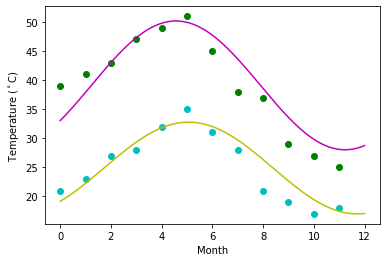

In [135]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'go')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(months, temp_min, 'co')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.show()

# Problem 2

In [136]:
import pandas as pd

In [137]:
data = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### 1. Create a pie chart presenting the male/female proportion

In [138]:
data['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

In [139]:
gender = list(data['sex'].value_counts().index)
gender_proportion = list(data['sex'].value_counts().values)
print(gender)
print()
print(gender_proportion)

['male', 'female']

[843, 466]


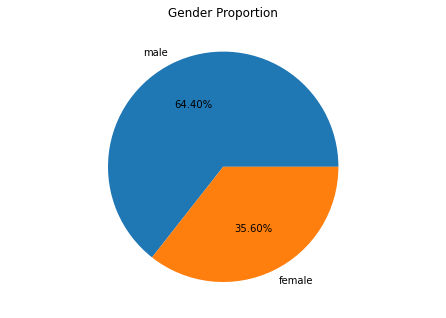

In [140]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(gender_proportion, labels = gender, autopct="%1.2f%%")
plt.title("Gender Proportion")
plt.show()

#### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

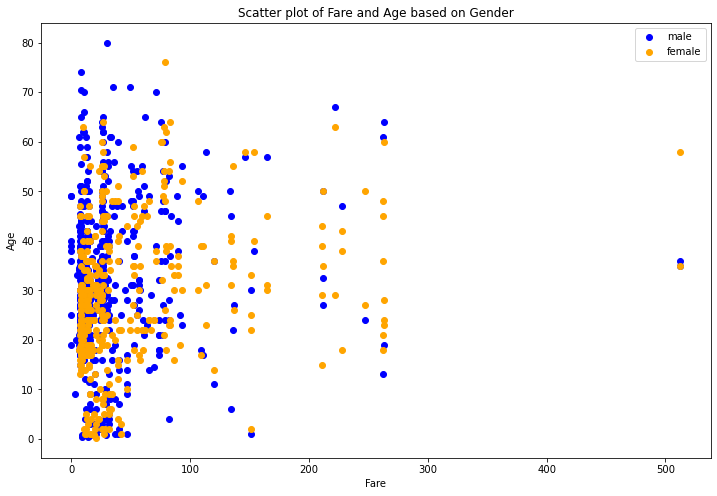

In [141]:
plt.figure(figsize=(12,8))
ax = plt.subplot()
ax.scatter(data[data.sex=='male'].fare, data[data.sex=='male'].age, color='blue', label='male')
ax.scatter(data[data.sex=='female'].fare, data[data.sex=='female'].age, color="orange", label='female')
ax.set_xlabel('Fare')
ax.set_ylabel('Age')
ax.set_title("Scatter plot of Fare and Age based on Gender")
ax.legend()
plt.show()